In [1]:
#1. Data Understanding and Summary Statistics
#•	Question 1: Load the dataset into a pandas DataFrame. Display the first 10 rows of the dataset. Describe the dataset by listing all the columns and their data types.
#•	Question 2: Calculate and display the summary statistics (mean, median, mode, standard deviation, etc.) for all numeric columns in the dataset. Identify any insights from these summary statistics.
#•	Question 3: Identify any columns that have missing values. Calculate the percentage of missing values in each of these columns.


In [2]:
import pandas as pd
df=pd.read_excel("eda_inventory_dataset_batch1.xlsx")

In [3]:
df.head(10)

,Product_ID,Product_Name,Category,Supplier,Purchase_Price,Sale_Price,Quantity_In_Stock,Reorder_Level,Units_On_Order,Discontinued
0,P0001,Doodad,Clothing,Supplier D,339.75,NaN,588.0,292.0,161.0,1
1,P0002,Doohickey,Clothing,Supplier C,NaN,470.14,348.0,114.0,70.0,1
2,P0003,Thingamajig,Clothing,Supplier B,NaN,460.10,146.0,NaN,163.0,1
3,P0004,Doohickey,Clothing,Supplier A,NaN,124.82,66.0,13.0,NaN,0
4,P0005,Doohickey,Toys,Supplier E,228.75,66.71,903.0,271.0,37.0,1
5,P0006,Gadget,Toys,Supplier E,401.21,NaN,519.0,89.0,NaN,0
6,P0007,Thingamajig,Furniture,Supplier A,412.99,230.48,NaN,215.0,136.0,1
7,P0008,Thingamajig,Electronics,Supplier A,430.21,267.92,339.0,444.0,199.0,1
8,P0009,Thingamajig,Clothing,Supplier B,NaN,33.22,174.0,278.0,178.0,0
9,P0010,Doohickey,Furniture,Supplier C,221.18,166.85,899.0,447.0,34.0,1


In [4]:
df.describe()

,Purchase_Price,Sale_Price,Quantity_In_Stock,Reorder_Level,Units_On_Order,Discontinued
count,801.000000,810.000000,896.000000,915.000000,902.000000,1000.000000
mean,251.924732,360.687049,490.196429,246.031694,97.648559,0.508000
std,140.640863,475.752708,291.169649,143.636135,57.119825,0.500186
min,10.010000,15.020000,0.000000,1.000000,0.000000,0.000000
25%,134.020000,154.667500,224.000000,120.000000,48.250000,0.000000
50%,253.790000,313.475000,497.000000,246.000000,96.000000,1.000000
75%,370.900000,460.060000,734.250000,371.000000,147.000000,1.000000
max,498.930000,4967.800000,998.000000,498.000000,199.000000,1.000000


In [5]:
df.isnull().sum()*0.1

,0
Product_ID,0.0
Product_Name,0.0
Category,0.0
Supplier,0.0
Purchase_Price,19.9
Sale_Price,19.0
Quantity_In_Stock,10.4
Reorder_Level,8.5
Units_On_Order,9.8
Discontinued,0.0


In [6]:
#2. Data Visualization
#•	Question 4: Create a histogram for the 'Sale_Price' column. What can you infer about the distribution of sale prices in the dataset?
#•	Question 5: Generate a box plot for the 'Quantity_In_Stock' column. Identify any outliers and describe how they could affect the analysis.
#•	Question 6: Create a scatter plot to visualize the relationship between 'Purchase_Price' and 'Sale_Price'.
#•	Question 7: Generate a heatmap to show the correlation between all numeric variables in the dataset. Which variables are most strongly correlated?


Text(0.5, 1.0, 'SALE PRICE')

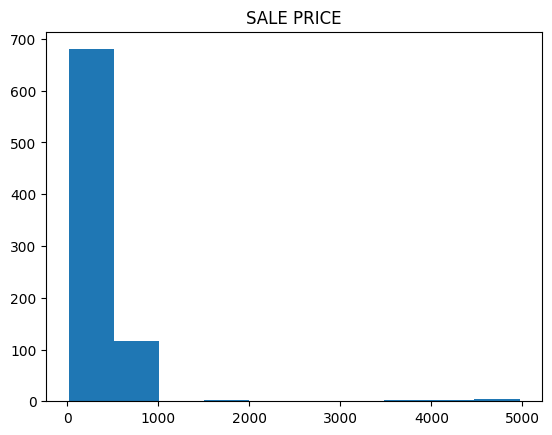

In [7]:
import matplotlib.pyplot as plt
plt.hist(df["Sale_Price"])
plt.title("SALE PRICE")

Text(0.5, 1.0, 'QUANTITY IN STOCK')

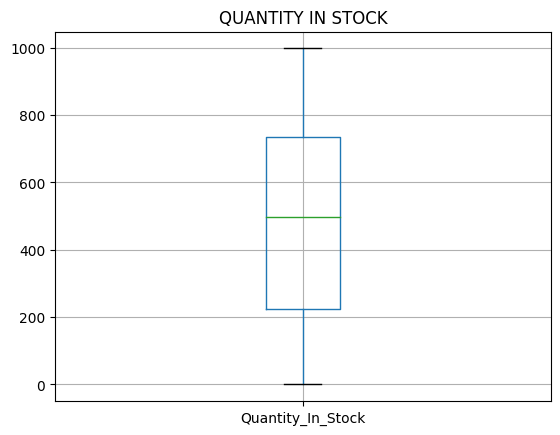

In [34]:
df.boxplot(column="Quantity_In_Stock")
plt.title("QUANTITY IN STOCK")

Text(0.5, 1.0, 'PURCHASE PRICE')

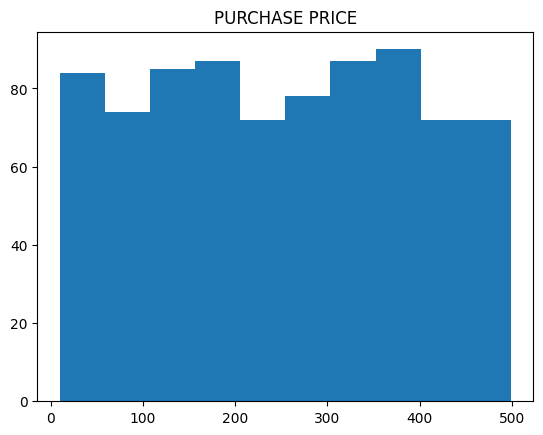

In [8]:
import matplotlib.pyplot as plt
plt.hist(df["Purchase_Price"])
plt.title("PURCHASE PRICE")

Text(0.5, 1.0, 'QUANTITY IN STOCK')

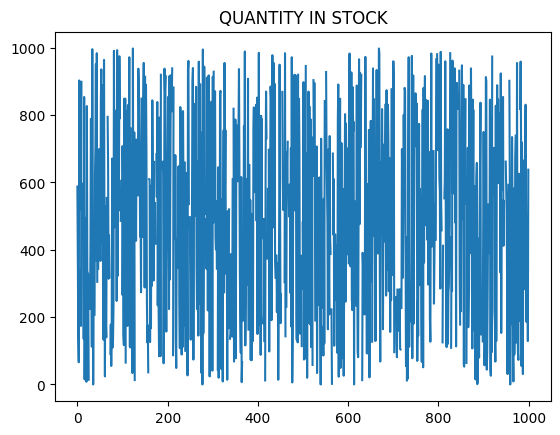

In [9]:
plt.plot(df["Quantity_In_Stock"])
plt.title("QUANTITY IN STOCK")

Text(0, 0.5, 'Sale Price')

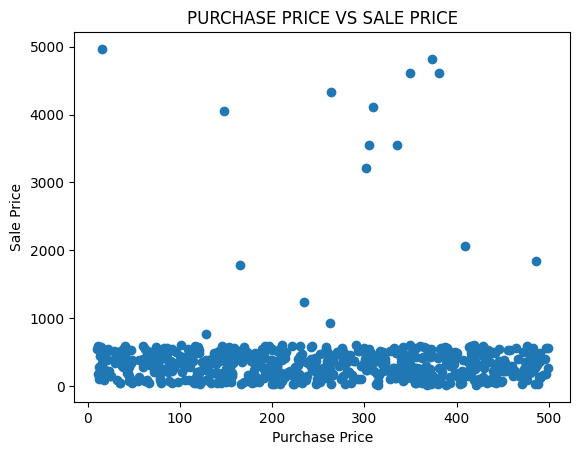

In [10]:
plt.scatter(df["Purchase_Price"],df["Sale_Price"])
plt.title("PURCHASE PRICE VS SALE PRICE")
plt.xlabel("Purchase Price")
plt.ylabel("Sale Price")

In [11]:
numdf=["Purchase_Price","Sale_Price","Quantity_In_Stock","Reorder_Level","Units_On_Order"]

In [12]:
corr=df[numdf].corr()
corr

,Purchase_Price,Sale_Price,Quantity_In_Stock,Reorder_Level,Units_On_Order
Purchase_Price,1.000000,0.013720,-0.012971,0.112292,-0.007786
Sale_Price,0.013720,1.000000,0.030317,-0.016483,0.019671
Quantity_In_Stock,-0.012971,0.030317,1.000000,-0.072619,0.044326
Reorder_Level,0.112292,-0.016483,-0.072619,1.000000,-0.021608
Units_On_Order,-0.007786,0.019671,0.044326,-0.021608,1.000000


<Axes: >

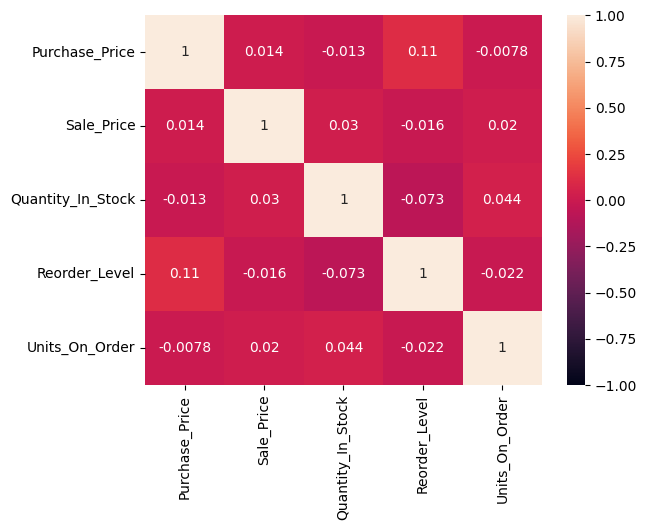

In [13]:
import seaborn as sns
sns.heatmap(corr,annot=True,vmin=-1,vmax=1)

In [14]:
#3. Handling Missing Data and Outliers
#•	Question 8: Impute the missing values in the 'Purchase_Price' and 'Sale_Price' columns using appropriate techniques (e.g., mean, median). Justify your choice of imputation method.
#•	Question 9: Remove the outliers in the 'Sale_Price' column using the Interquartile Range (IQR) method. Compare the summary statistics before and after removing outliers.


In [15]:
df["Sale_Price"].fillna(df["Sale_Price"].median(),inplace=True)

In [16]:
df["Purchase_Price"].fillna(df["Purchase_Price"].mean(),inplace=True)

In [17]:
q1=df["Sale_Price"].quantile(0.25)
q3=df["Sale_Price"].quantile(0.75)
print(q1)
print(q3)

196.95
419.195


In [18]:
iqr=q3-q1
print(iqr)
lb=q1-(1.5*iqr)
ub=q3+1.5*iqr
print(lb)
print(ub)

222.245
-136.41750000000002
752.5625


In [19]:
import numpy as np
x_sale=np.reshape(df["Sale_Price"],-1)
print(x_sale)

[ 313.475  470.14   460.1    124.82    66.71   313.475  230.48   267.92
   33.22   166.85    34.7    529.32   157.39   341.04    37.8    405.11
  203.97   540.28   313.475  205.3    542.06   313.475  497.87   509.25
  313.475  352.37    54.34    70.53   599.35   206.08   452.69   486.9
  516.94   313.475  156.28    38.61   255.55    91.1     28.12   225.85
  473.49   346.22   197.98   397.79   150.73    23.41   313.475  379.89
 4609.5     37.78   504.71   377.42   344.59   380.4    520.69   313.475
 3548.6    594.55   313.475  273.74   428.83   242.7    313.475  364.16
  557.99   558.55   215.01   323.69   138.81   597.44   588.95   313.475
  485.58   433.33   362.      46.21   281.04   409.75   313.475  233.28
  313.475  112.9    307.71   419.17   313.475  313.475  176.04   313.475
  387.03   365.59   119.92   313.475  281.28   405.64   313.475  114.29
   26.2    470.78   371.67   424.29   505.32   484.64   577.14   328.52
  300.77   313.475  104.91   349.98   177.05   553.96   356.17

In [20]:
outlier=((x_sale<lb)|(x_sale>ub))

In [21]:
outlier

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [22]:
cleaned=df[~outlier]

In [23]:
cleaned

,Product_ID,Product_Name,Category,Supplier,Purchase_Price,Sale_Price,Quantity_In_Stock,Reorder_Level,Units_On_Order,Discontinued
0,P0001,Doodad,Clothing,Supplier D,339.750000,313.475,588.0,292.0,161.0,1
1,P0002,Doohickey,Clothing,Supplier C,251.924732,470.140,348.0,114.0,70.0,1
2,P0003,Thingamajig,Clothing,Supplier B,251.924732,460.100,146.0,NaN,163.0,1
3,P0004,Doohickey,Clothing,Supplier A,251.924732,124.820,66.0,13.0,NaN,0
4,P0005,Doohickey,Toys,Supplier E,228.750000,66.710,903.0,271.0,37.0,1
...,...,...,...,...,...,...,...,...,...,...
995,P0996,Gadget,Electronics,Supplier D,350.370000,122.910,186.0,82.0,14.0,0
996,P0997,Widget,Toys,Supplier E,117.170000,133.340,497.0,428.0,35.0,0
997,P0998,Widget,Electronics,Supplier C,301.700000,241.220,441.0,72.0,62.0,0
998,P0999,Doodad,Toys,Supplier B,139.670000,44.920,129.0,310.0,68.0,0


In [24]:
#4. Advanced Data Visualization and Insights
#•	Question 10: Create a pair plot for the top 5 numeric columns in the dataset. What patterns or trends can you identify from the pair plot?
#•	Question 11: Generate a bar plot showing the average 'Sale_Price' for each 'Category' in the dataset. What conclusions can you draw about the pricing strategies across different categories?
#•	Question 12: Perform a group-by operation to find the total 'Quantity_In_Stock' for each 'Supplier'. Visualize this data using a bar chart and discuss any significant findings.


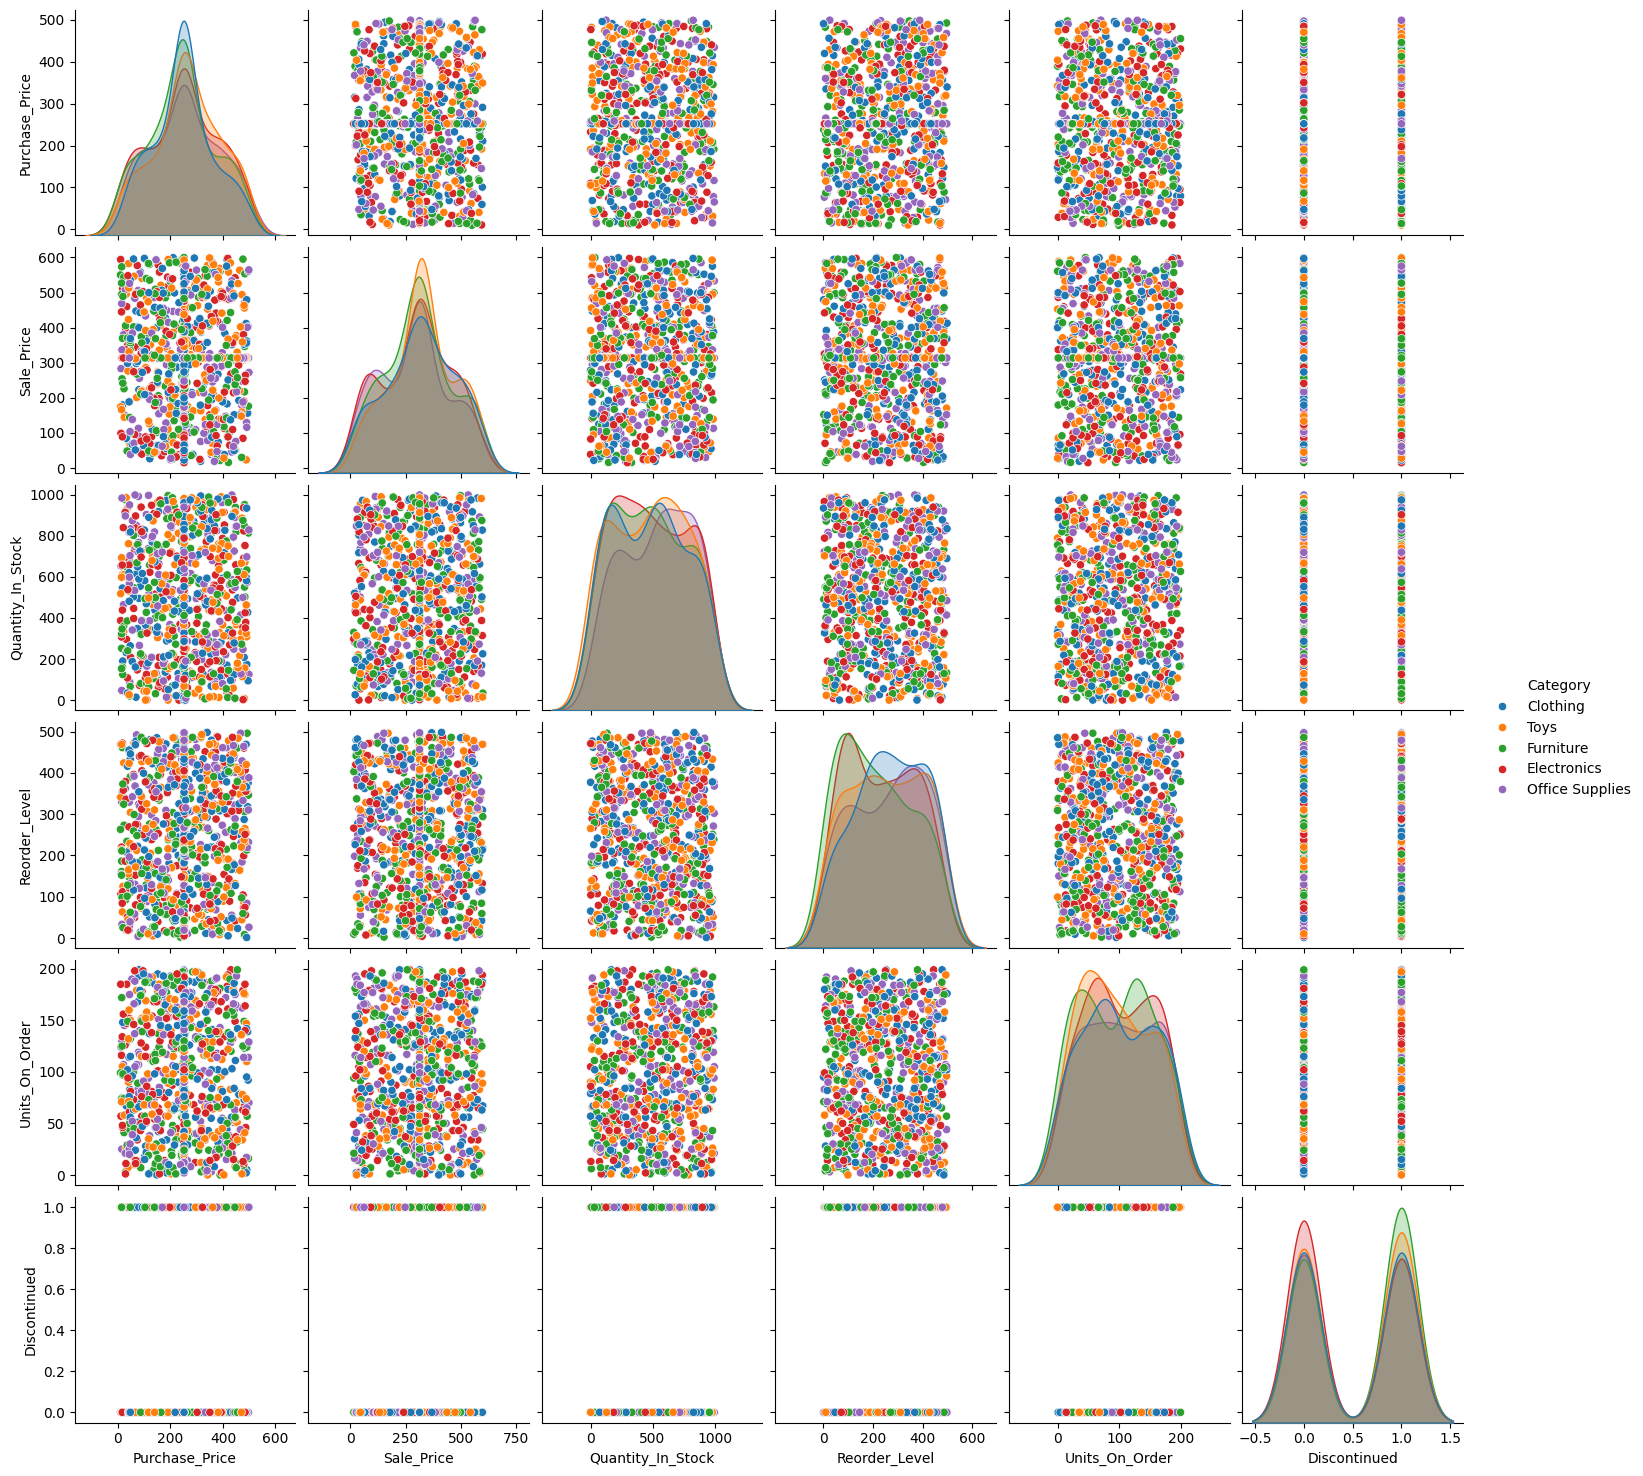

In [25]:
import seaborn as sns
sns.pairplot(cleaned,hue="Category")

Text(0.5, 1.0, 'CATEGORY VS SALE PRICE')

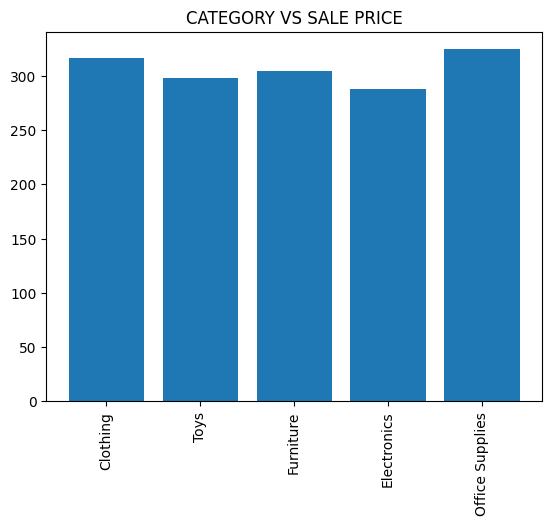

In [27]:
x=cleaned["Category"].unique()
y=cleaned.groupby("Category")["Sale_Price"].mean()
plt.bar(x,y)
plt.xticks(rotation=90)
plt.title("CATEGORY VS SALE PRICE")

Text(0.5, 1.0, 'SUPPLIER VS QUANTITY IN STOCK')

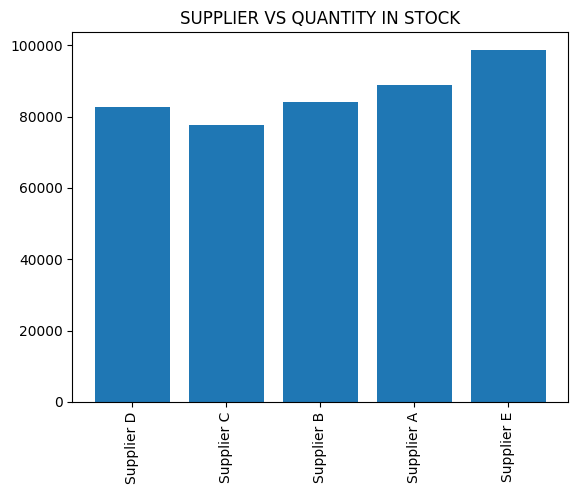

In [28]:
x=cleaned["Supplier"].unique()
y=cleaned.groupby("Supplier")["Quantity_In_Stock"].sum()
plt.bar(x,y)
plt.xticks(rotation=90)
plt.title("SUPPLIER VS QUANTITY IN STOCK")